# Apêndice A.

In [231]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

## Importações.

In [232]:
import numpy as np
import matplotlib.pyplot as plt
import os

import tensorflow as tf
from tensorflow import keras
from keras import layers

tf.test.gpu_device_name()

2021-08-25 19:53:20.596702: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set


''

## Configurações.

In [233]:
input_shape = (70,50,3)
batch = 32

## Importação do Dataset.

In [241]:
BASE_PATH = ['../..','datasets']
DATASET_DIR=['dataset2','PKLotSegmented','UFPR04','todos']

DATASET_DIR = os.path.join(BASE_PATH[0],BASE_PATH[1],
                           DATASET_DIR[0],DATASET_DIR[1],DATASET_DIR[2],DATASET_DIR[3])


X = tf.keras.preprocessing.image_dataset_from_directory(DATASET_DIR, image_size=input_shape[:2], batch_size=batch, label_mode='binary',
                                                        seed=1, color_mode='rgb', validation_split=0.3, subset = 'training')


X_val = tf.keras.preprocessing.image_dataset_from_directory(DATASET_DIR, image_size=input_shape[:2], batch_size=batch, label_mode='binary',
                                                        seed=1, color_mode='rgb', validation_split=0.3, subset = 'validation')


print('\nClasses: {} em {}'.format(X.class_names,DATASET_DIR))

Found 105843 files belonging to 2 classes.
Using 74091 files for training.
Found 105843 files belonging to 2 classes.
Using 31752 files for validation.

Classes: ['Empty', 'Occupied'] em ../../datasets/dataset2/PKLotSegmented/UFPR04/todos


## Construindo o modelo e compilando.

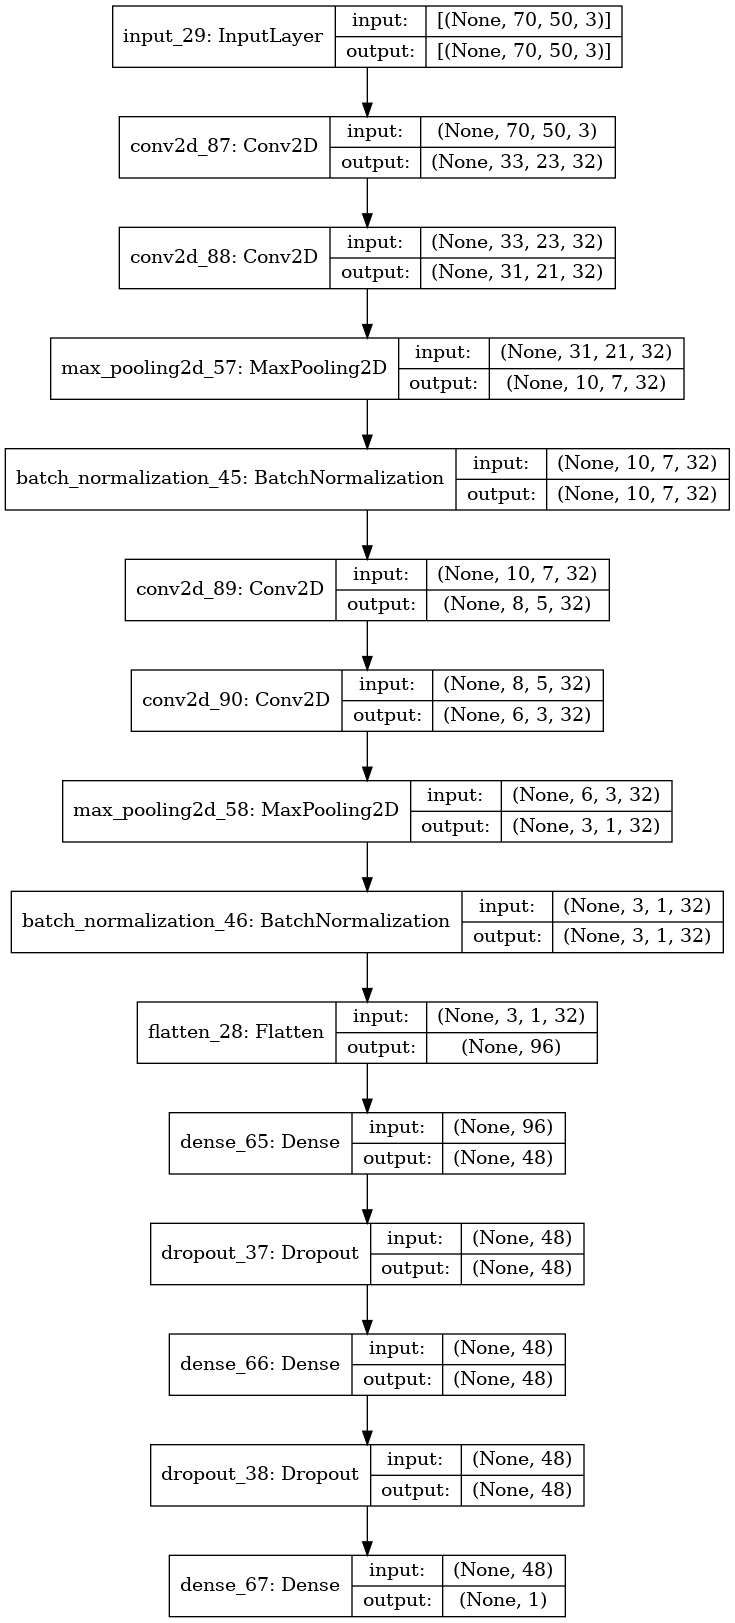

In [238]:
input_shape = (70,50,3)
def modelo():
    model = keras.Sequential(
    [
        layers.InputLayer(input_shape),
        layers.Conv2D(filters=32,kernel_size=5,strides=2, activation="relu"),
        layers.Conv2D(32, 3, activation="relu"),
        layers.MaxPooling2D(pool_size=3),
        layers.BatchNormalization(),
        
        layers.Conv2D(32,3, activation="relu"),
        layers.Conv2D(32,3, activation="relu"),
        layers.MaxPooling2D(2),
        layers.BatchNormalization(),
        
        layers.Flatten(),
        layers.Dense(48,activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(48,activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(1, activation="sigmoid"),
    ]
)

    return model

model = modelo()

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#model.summary()
keras.utils.plot_model(model, "arquitetura.png", show_shapes=True)

## Testando os Labels carregadas da base de treinamento.

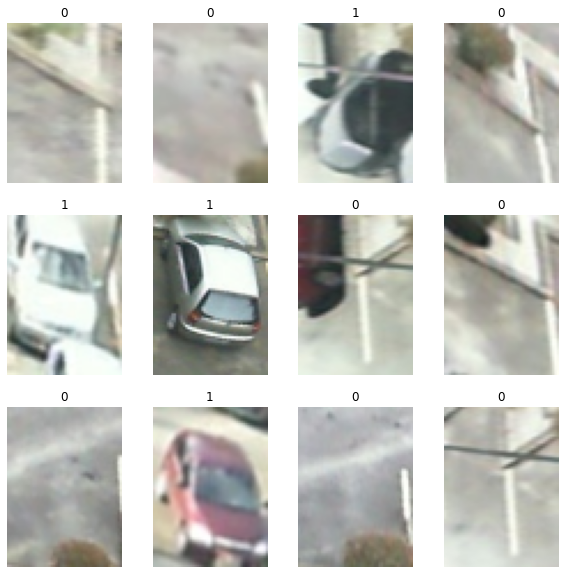

In [239]:
plt.figure(figsize=(10, 10))
for images, labels in X.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

### Exemplo de Imagem não segmentada.

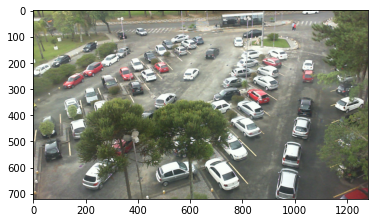

In [240]:
img_full = os.path.join(BASE_PATH[0],BASE_PATH[1],
                        'dataset2','PKLot','UFPR04','Sunny','2012-12-07','2012-12-07_17_12_25.jpg')

img_full = plt.imread(img_full)
plt.imshow(img_full)

## Treinando o modelo.

In [198]:
%%time
model.fit(X, epochs=9)

Epoch 1/9
2316/2316 [==============================] - 87s 37ms/step - loss: 0.0607 - accuracy: 0.9792
Epoch 2/9
2316/2316 [==============================] - 80s 34ms/step - loss: 0.0154 - accuracy: 0.9958
Epoch 3/9
2316/2316 [==============================] - 73s 31ms/step - loss: 0.0103 - accuracy: 0.9973
Epoch 4/9
2316/2316 [==============================] - 70s 30ms/step - loss: 0.0064 - accuracy: 0.9982
Epoch 5/9
2316/2316 [==============================] - 69s 30ms/step - loss: 0.0054 - accuracy: 0.9987
Epoch 6/9
2316/2316 [==============================] - 67s 29ms/step - loss: 0.0068 - accuracy: 0.9981
Epoch 7/9
2316/2316 [==============================] - 69s 30ms/step - loss: 0.0051 - accuracy: 0.9987
Epoch 8/9
2316/2316 [==============================] - 70s 30ms/step - loss: 0.0070 - accuracy: 0.9982
Epoch 9/9
2316/2316 [==============================] - 71s 31ms/step - loss: 0.0041 - accuracy: 0.9988
CPU times: user 47min 20s, sys: 1min 39s, total: 49min
Wall time: 10min 5

## Validação do modelo treinado. (testando na base de dados de validação)

In [199]:
score = model.evaluate(X_val, verbose=2)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

993/993 - 10s - loss: 0.0107 - accuracy: 0.9981
Test loss: 0.01074342243373394
Test accuracy: 0.9980788826942444


## Salvando o modelo treinado.

In [200]:
SAVE_DIR = os.path.split(DATASET_DIR)[0] # Separa (head,tail) -> Indice [0] = head
SAVE_DIR = os.path.join(SAVE_DIR,'model')
model.save(
    SAVE_DIR,
    overwrite=False,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None,
    save_traces=True,
)

[WARNING] ../../datasets/dataset2/PKLotSegmented/UFPR04/model already exists - overwrite? [y/n] y


[TIP] Next time specify overwrite=True!
INFO:tensorflow:Assets written to: ../../datasets/dataset2/PKLotSegmented/UFPR04/model/assets


In [201]:
SAVE_DIR = os.path.split(DATASET_DIR)[0] # Separa (head,tail) -> Indice [0] = head
SAVE_DIR

'../../datasets/dataset2/PKLotSegmented/UFPR04'

## Validação individual(random) na base de treinamento

Vaga livre: 6.58 porcento.
Vaga ocupada 93.42 porcento.


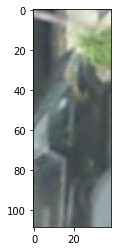

In [210]:
path = X.file_paths[np.random.randint(len(X.file_paths))]
img = keras.preprocessing.image.load_img(path, target_size=input_shape[:2])
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array,  0)

predictions = model.predict(img_array)
score = predictions[0]

print(
    'Vaga livre: %.2f porcento.\nVaga ocupada %.2f porcento.'
    % (100 * (1 - score), 100 * score)
)

plot = plt.imread(path)
plt.imshow(plot)


## Validação individual(random) no Banco de testes

Vaga livre: 100.00 porcento.
Vaga ocupada 0.00 porcento.


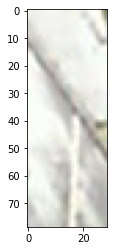

In [215]:
path = X_val.file_paths[np.random.randint(len(X_val.file_paths))]
img = keras.preprocessing.image.load_img(path, target_size=input_shape[:2])
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array,  0)

predictions = model.predict(img_array)
score = predictions[0]

print(
    'Vaga livre: %.2f porcento.\nVaga ocupada %.2f porcento.'
    % (100 * (1 - score), 100 * score)
)

plot = plt.imread(path)
plt.imshow(plot)


## Debug 